## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/22s_msai/homeworks/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=7575)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


In [3]:
names = [i for i in range(0,20)]
dataframe = pd.read_csv('car_data.csv', names = names)


<AxesSubplot:>

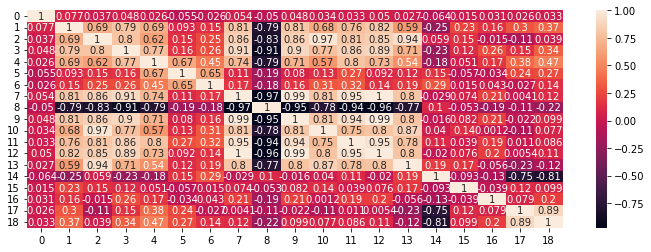

In [4]:
# check the correlation
import seaborn as sns
corr = dataframe.corr()
plt.figure(figsize=[12,4])
sns.heatmap(corr, annot=True)

### -> regularization can be applied, since we have correlated features.

In [5]:
pd.DataFrame(dataset).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [6]:
np.unique(target)

array(['bus', 'opel', 'saab', 'van'], dtype=object)

To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [7]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,298,91,40,98,192,64,9,177,38,21,135,194,465,165,66,9,35,195,205
1,197,82,44,72,150,64,7,154,44,19,144,181,350,177,80,0,16,183,187
2,679,89,41,76,183,73,7,157,42,19,136,181,373,153,74,8,12,191,195
3,212,90,41,71,169,68,7,150,44,19,138,175,336,157,71,3,18,192,197
4,536,102,55,101,213,67,12,222,30,25,177,226,719,213,71,2,21,187,199
5,782,87,44,98,211,70,10,189,35,22,141,214,535,178,71,2,21,187,194
6,299,98,40,77,171,61,6,172,37,21,139,197,457,141,72,4,17,199,201
7,583,104,54,101,197,64,11,213,31,24,172,218,669,222,74,14,4,187,196
8,99,87,44,65,124,56,6,149,46,19,144,170,321,171,87,4,12,179,182
9,588,89,38,78,153,61,7,146,46,19,127,166,314,142,69,0,9,187,194


Methods `describe` and `info` deliver some useful information.

In [8]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,415.020036,93.666667,44.828780,81.894353,168.808743,61.812386,8.697632,168.080146,41.129326,20.522769,147.972678,188.069217,436.216758,174.679417,72.378871,6.679417,12.418944,188.974499,195.744991
std,243.722098,8.369217,6.223617,15.679143,33.313237,8.030698,4.808335,33.452452,7.816534,2.605078,14.739254,31.806479,178.086111,32.413095,7.793315,4.885473,8.773471,6.086608,7.327368
min,1.000000,73.000000,33.000000,40.000000,109.000000,48.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,114.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,207.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,136.000000,167.000000,316.000000,149.000000,67.000000,3.000000,5.000000,184.000000,191.000000
50%,412.000000,93.000000,44.000000,80.000000,166.000000,61.000000,8.000000,156.000000,43.000000,19.000000,146.000000,177.000000,360.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,620.000000,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,197.000000,46.000000,23.000000,160.000000,216.000000,583.000000,198.000000,75.000000,10.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,112.000000,333.000000,138.000000,52.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [9]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [10]:
### YOUR CODE HERE
import seaborn as sns
def get_boxplot(X, columns=[]):
  for i in columns:
    sns.boxplot(x=X[i])
  pass 

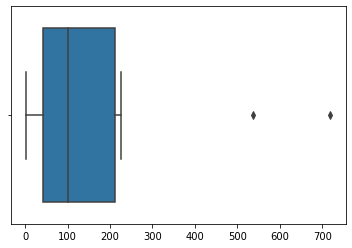

In [11]:
get_boxplot(X_train,columns=[4])

In [12]:
#for i in range(19):    
#    X_train[X_train>500]=min(X_train[i])

In [13]:
# transform the target names to integers (0, 1, 2, 3)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

dataset[:, -1] = encoder.fit_transform(dataset[:, -1])

In [14]:
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

X_train_orig, X_test_orig, y_train_leTrans, y_test_leTrans = train_test_split(data, target, test_size=0.35, random_state=7575)
y_train_leTrans=y_train_leTrans.astype('int')
y_test_leTrans=y_test_leTrans.astype('int')

In [15]:
# normalization, make it between 0..1 (This estimator scales and 
#translates each feature individually such that it is in the given range on the training set)
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_train_MMscal = scaler.fit_transform(X_train_orig)
X_test_MMscal = scaler.transform(X_test_orig)

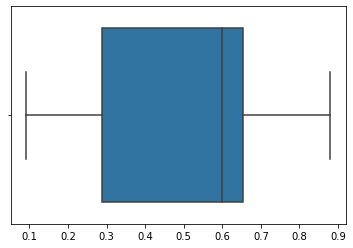

In [16]:
get_boxplot(X_train_MMscal,columns=[4])

--> in boxplot after normalization we do not see values that are more than others (выбросы)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [17]:
### YOUR CODE HERE

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty = 'none',multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
# train
model.fit(X_train_MMscal, y_train_leTrans) 

LogisticRegression(max_iter=500, multi_class='multinomial', penalty='none',
                   solver='saga', tol=0.001)

In [18]:
# test
model.score(X_test_MMscal, y_test_leTrans)

0.7946127946127947

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score( LogisticRegression(penalty='none', multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500), X_train_MMscal, y_train_leTrans, cv = 15, scoring = 'accuracy' )

array([0.81081081, 0.83783784, 0.72972973, 0.81081081, 0.72972973,
       0.89189189, 0.81081081, 0.67567568, 0.78378378, 0.77777778,
       0.77777778, 0.72222222, 0.77777778, 0.77777778, 0.77777778])

In [20]:
from sklearn.model_selection import GridSearchCV
params = [ {'penalty': ['l1', 'l2', 'elasticnet', 'none'] } ]
gs = GridSearchCV(  LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500), param_grid = params, scoring = 'accuracy', return_train_score = False )
gs.fit( X_train_MMscal, y_train_leTrans)
gs.cv_results_
gs.best_params_

{'penalty': 'none'}

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve

In [22]:
y_pred_MMscal = model.predict(X_test_MMscal)


In [23]:
import sklearn
sklearn.metrics.f1_score(y_test_leTrans, y_pred_MMscal, average=None)

array([0.92397661, 0.63448276, 0.65277778, 0.95522388])

In [24]:
sklearn.metrics.f1_score(y_test_leTrans, y_pred_MMscal, average=None).mean()

0.7916152562956542

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_leTrans, y_pred_MMscal)

0.7946127946127947

In [26]:
y_pred_proba_MMscal = model.predict_proba(X_test_MMscal)

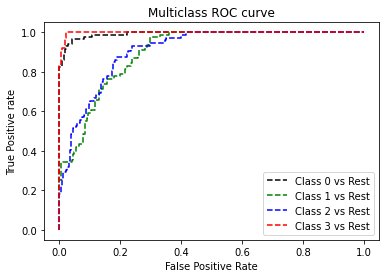

In [27]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_leTrans, y_pred_proba_MMscal[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='k', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='r', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    


#### -> class 3 (van) is the best one

In [28]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [29]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

Text(0, 0.5, 'variance')

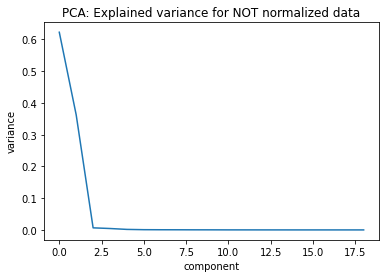

In [30]:
pca.fit(X_train)
explained_var = pca.explained_variance_ratio_
plt.plot(explained_var)
plt.title('PCA: Explained variance for NOT normalized data')
plt.xlabel('component')
plt.ylabel('variance')

In [31]:
pca.fit(X_train_MMscal)

PCA()

In [32]:
explained_var = pca.explained_variance_ratio_

Text(0, 0.5, 'variance')

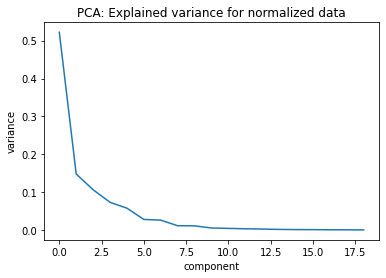

In [33]:
plt.plot(explained_var)
plt.title('PCA: Explained variance for normalized data')
plt.xlabel('component')
plt.ylabel('variance')

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

### ->> PCA is effected by scale so you need to scale the train data before applying PCA. 

In [34]:
from sklearn.decomposition import PCA
score = []
for i in range(1,20):
    pca = PCA(n_components=i)
    X_train_trans = pca.fit_transform(X_train_orig)
    X_test_trans = pca.transform(X_test_orig)
    model = LogisticRegression(penalty = 'none',multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
    model.fit(X_train_trans, y_train_leTrans)
    score_i = model.score(X_test_trans, y_test_leTrans)
    score.append(score_i)
    
#print(score)
print(max(score), 'number of components = ', score.index(max(score))+1)

0.7508417508417509 number of components =  17


### ->> n_components = 17, 18 shows the best result

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
model = LogisticRegression(penalty = 'none',multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000)
y_train=y_train_leTrans.astype('int')
y_test=y_test_leTrans.astype('int')
model.fit(X_train_MMscal, y_train_leTrans)
model.score(X_test_MMscal, y_test_leTrans)

0.7946127946127947

In [37]:
logistic = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

In [38]:
param_grid = {
    "pca__n_components": [2, 4, 10, 15, 16, 17, 18, 19],
    "logistic__C": np.logspace(-4, 4, 4),
}

In [39]:
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train_orig, y_train_leTrans)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was

Best parameter (CV score=0.776):
{'logistic__C': 10000.0, 'pca__n_components': 18}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [40]:
pca = PCA(n_components = 18)
X_train_pca18 = pca.fit_transform(X_train_orig)
X_test_pca18 = pca.transform(X_test_orig)


In [41]:
logistic = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter = 10000)
logistic.fit(X_train_pca18, y_train_leTrans)

LogisticRegression(max_iter=10000, multi_class='multinomial', solver='saga',
                   tol=0.001)

In [42]:
y_pred_proba_pca18 = logistic.predict_proba( X_test_pca18 )

In [43]:
roc_auc_score(y_test_leTrans, y_pred_proba_pca18, multi_class='ovo', average='weighted')


0.9334742048634879

In [44]:
logistic.score(X_test_pca18, y_test_leTrans)

0.7575757575757576

In [45]:
y_pred_pca18 = logistic.predict( X_test_pca18 )

In [46]:
sklearn.metrics.f1_score(y_test_leTrans, y_pred_pca18 , average=None)

array([0.88043478, 0.58015267, 0.62857143, 0.89208633])

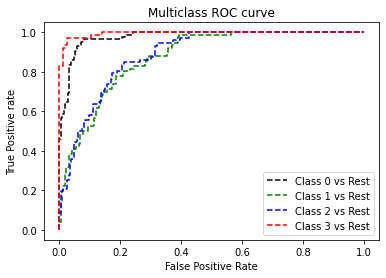

In [47]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_leTrans, y_pred_proba_pca18[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='k', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='r', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    



#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

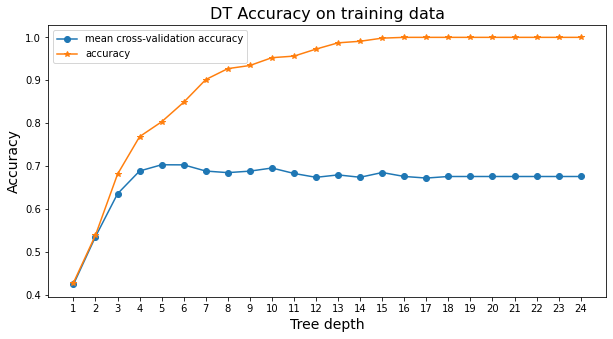

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# function for fitting trees of various depths on the training data using cross-validation
def cross_validation_on_trees(X, y, tree_depths, cv=20, scoring ='accuracy'):
    cv_scores_list = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth, random_state=7575)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean,  accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy')
    ax.plot(depths, accuracy_scores, '-*', label='accuracy')
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
tree_depths = range(1,25)
cv_scores_mean, accuracy_scores = cross_validation_on_trees(X_train_orig, y_train_leTrans, tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(tree_depths, cv_scores_mean, accuracy_scores, 
                               'DT Accuracy on training data')


In [49]:
i_max = cv_scores_mean.argmax()
best_tree_depth = tree_depths[i_max]
best_tree_cv_score = cv_scores_mean[i_max]
print(f'The depth-{best_tree_depth} tree achieves the best mean cross-validation accuracy {best_tree_cv_score}')


The depth-5 tree achieves the best mean cross-validation accuracy 0.7031084656084655


In [50]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate a best-depth tree
best_tree_accuracy_train, best_tree_accuracy_test = run_single_tree(X_train_orig, y_train_leTrans, 
                                                                    X_test_orig, y_test_leTrans, 
                                                                    best_tree_depth)


Single tree depth:  5
Accuracy, Training Set:  80.32787 %
Accuracy, Test Set:  69.36027 %


In [51]:
model = DecisionTreeClassifier(max_depth=best_tree_depth).fit(X_train_orig, y_train_leTrans)
y_pred_DT = model.predict(X_test_orig)
y_pred_DT_proba = model.predict_proba(X_test_orig)

In [52]:
sklearn.metrics.f1_score(y_test_leTrans, y_pred_DT , average=None)

array([0.93103448, 0.35514019, 0.57297297, 0.828125  ])

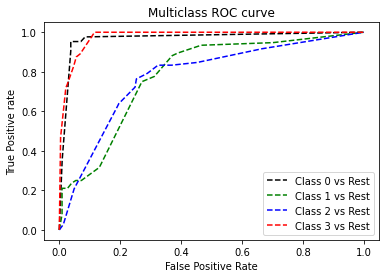

In [53]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_leTrans, y_pred_DT_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='k', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='r', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    



#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [54]:
estimators = 10
# create ten bootstrap samples 
samples = [np.random.choice(a=X_train_orig.shape[0], size=X_train_orig.shape[0], replace=True, ) for _ in range(estimators)]

In [55]:
models = []
for sample in samples:
    model = DecisionTreeClassifier(max_depth=5,random_state=7575)
    model.fit(X_train_orig[sample], y_train_leTrans[sample])
    models.append(model)

In [56]:
def predict_new(models, X):
    predictions = None
    for m in models:
        if predictions is None:
            predictions = m.predict(X).reshape((-1, 1))
        else:
            predictions = np.hstack((predictions, m.predict(X).reshape((-1, 1))))
    result = []
    for p in predictions:
        result.append(np.bincount(p).argmax())
    return np.array(result)

In [57]:
y_pred = predict_new(models, X_test_orig)
print(np.mean(y_pred == y_test_leTrans))
print("MODELS:")
for m in models:
    print(np.mean(m.predict(X_test_orig) == y_test_leTrans))

0.7138047138047138
MODELS:
0.6296296296296297
0.6632996632996633
0.7407407407407407
0.6902356902356902
0.6632996632996633
0.6565656565656566
0.7171717171717171
0.6801346801346801
0.6565656565656566
0.6868686868686869


#### DT

In [58]:
mean_score = []
mean_f1 = []
for estimators in range(2, 101, 5):
# create (2,100) bootstrap samples 
    samples = [np.random.choice(a=X_train_orig.shape[0], size=X_train_orig.shape[0], replace=True, ) for _ in range(estimators)]
    models = []
    for sample in samples:
        model = DecisionTreeClassifier(max_depth=5,random_state=7575)
        model.fit(X_train_orig[sample], y_train_leTrans[sample])
        models.append(model)
    
    y_pred = predict_new(models, X_test_orig)
    #mean_score.append(np.mean(y_pred == y_test_leTrans))
    mean_score1 = []
    mean_f11 = []
    for m in models:
        a = np.mean(m.predict(X_test_orig) == y_test_leTrans)
        f1 = sklearn.metrics.f1_score(y_test_leTrans, y_pred, average=None).mean()
        mean_score1.append(a)
        mean_f11.append(f1)
    mean_score1 = np.mean(mean_score1)
    mean_f11 = np.mean(mean_f11)
    mean_score.append(mean_score1)
    mean_f1.append(mean_f11)

In [59]:
estimators = [i for i in range(2,101,5)]

def plot_mean_score(estimators, title, mean_score, mean_f1):
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    ax.plot(estimators, mean_score, '-o', label='mean accuracy')
    ax.plot(estimators, mean_f1, '-*', label='mean f1')
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('size of ensembles', fontsize=14)
    ax.set_ylabel('mean Accuracy', fontsize=14)
    ax.set_xticks(estimators)
    ax.legend()

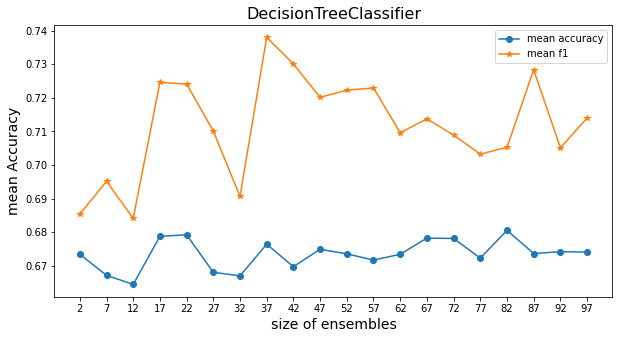

In [60]:
plot_mean_score(estimators, 'DecisionTreeClassifier',mean_score, mean_f1)

-> Optimum number of size is = 37, where we get the bet accuracy. Optimal hyperparameters shall be separately found for ensembles, and they are not equal to those we have in single DT

#### Logistic regression


In [61]:
mean_score = []
mean_f1 = []
for estimators in range(2, 101, 5):
# create (2,100) bootstrap samples 
    samples = [np.random.choice(a=X_train_orig.shape[0], size=X_train_orig.shape[0], replace=True, ) for _ in range(estimators)]
    models = []
    for sample in samples:
        model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter = 500, random_state=7575)
        model.fit(X_train_orig[sample], y_train_leTrans[sample])
        models.append(model)
    
    y_pred = predict_new(models, X_test_orig)
    #mean_score.append(np.mean(y_pred == y_test_leTrans))
    mean_score1 = []
    mean_f11 = []
    for m in models:
        a = np.mean(m.predict(X_test_orig) == y_test_leTrans)
        f1 = sklearn.metrics.f1_score(y_test_leTrans, y_pred, average=None).mean()
        mean_score1.append(a)
        mean_f11.append(f1)
    mean_score1 = np.mean(mean_score1)
    mean_f11 = np.mean(mean_f11)
    mean_score.append(mean_score1)
    mean_f1.append(mean_f11)

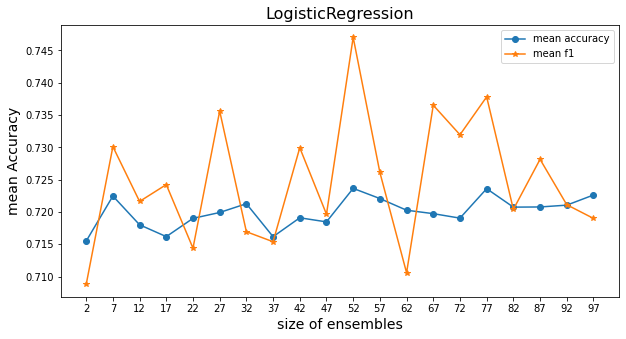

In [62]:
estimators = [i for i in range(2,101,5)]
plot_mean_score(estimators, 'LogisticRegression',mean_score, mean_f1)

-> Optimum number of size is = 52, where we get the best accuracy. Optimal hyperparameters shall be separately found for ensembles, and they are not equal to those we have in single logres

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_RFC_scores = []
model_RFC_f1mean = []

for trees in range (2,50):
    model_RFC = RandomForestClassifier(n_estimators=trees, random_state=7575)
    model_RFC.fit(X_train_orig, y_train_leTrans)
    model_RFC_scores.append(model_RFC.score(X_test_orig, y_test_leTrans))
    
    y_pred_RFC = model_RFC.predict(X_test_orig)
   
    model_RFC_f1mean.append(sklearn.metrics.f1_score(y_test_leTrans, y_pred_RFC , average=None).mean())


In [64]:
print(f'the best score = {max(model_RFC_scores)},with optimal number of trees= {model_RFC_scores.index(max(model_RFC_scores))+2}')

the best score = 0.8013468013468014,with optimal number of trees= 35


In [65]:
trees = [i for i in range(2,50)]
def plot_RFC(trees):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(trees, model_RFC_scores, '-o', label='accuracy')
    ax.plot(trees, model_RFC_f1mean, '-*', label='f1mean')
    ax.set_title('Random Forest', fontsize=16)
    ax.set_xlabel('Number of trees', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_xticks(trees)
    ax.legend()

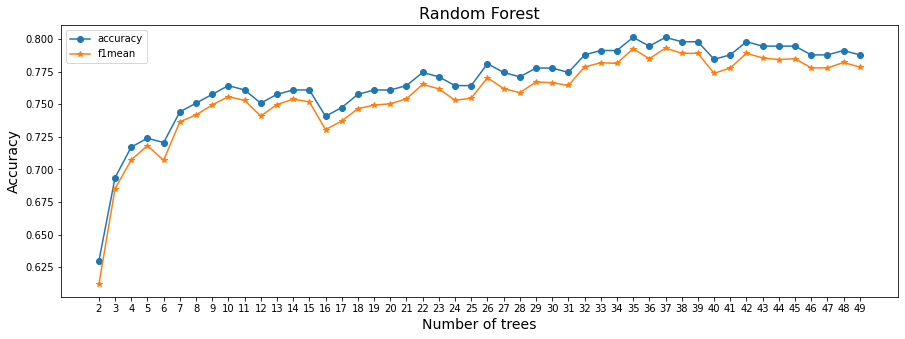

In [66]:
plot_RFC(trees)

#### 2.8. Gradient boosting
Now select the gradient boosting framework you prefer (LightGBM, XGBoost, CatBoost) and repeat the same experiments.

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal size of the you've got? Explain the results briefly.

In [67]:
from xgboost import XGBClassifier


In [68]:
model_XGBC_scores = []
model_XGBC_f1mean = []
trees = [i for i in range(2,50)]
for trees in range (2,50):
    model_XGBC = XGBClassifier(n_estimators=trees,random_state=7575)
    model_XGBC.fit(X_train_orig, y_train_leTrans)
    model_XGBC_scores.append(model_XGBC.score(X_test_orig, y_test_leTrans))
    
    y_pred_XGBC = model_XGBC.predict(X_test_orig)
   
    model_XGBC_f1mean.append(sklearn.metrics.f1_score(y_test_leTrans, y_pred_XGBC , average=None).mean())



In [69]:
trees = [i for i in range(2,50)]
def plot_XGBC(trees):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(trees, model_RFC_scores, '-o', label='accuracy')
    ax.plot(trees, model_RFC_f1mean, '-*', label='f1mean')
    ax.set_title('Gradient boosting', fontsize=16)
    ax.set_xlabel('Number of trees', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_xticks(trees)
    ax.legend()


In [70]:
print(f'the best score = {max(model_XGBC_scores)},with optimal number of trees= {model_XGBC_scores.index(max(model_XGBC_scores))+2}')

the best score = 0.7777777777777778,with optimal number of trees= 27


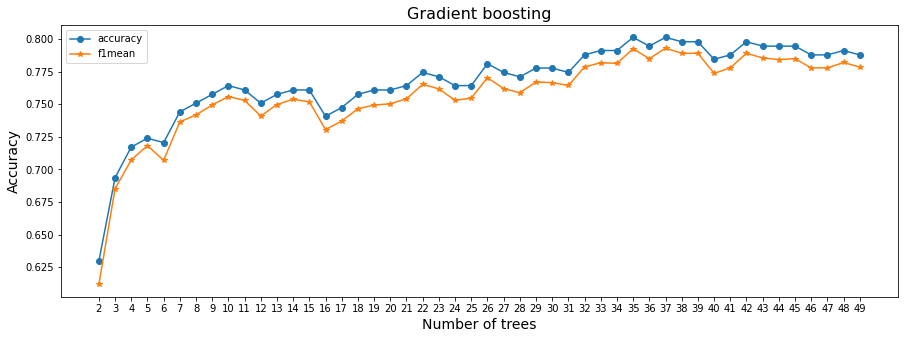

In [71]:
plot_XGBC(trees)

with XGBClassifier we get less score.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [72]:
from sklearn.model_selection import learning_curve

In [73]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)



In [74]:
LR = LogisticRegression(penalty = 'none',multi_class='multinomial', solver='saga', tol=1e-3, max_iter=700, random_state=7575)
DT = DecisionTreeClassifier(random_state=7575,max_depth=5)  
RF = RandomForestClassifier(random_state=7575, n_estimators=35)
all_ = [LR, DT,RF]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


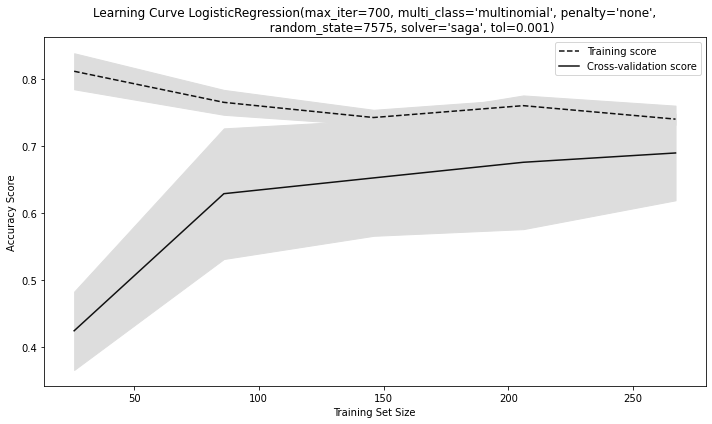

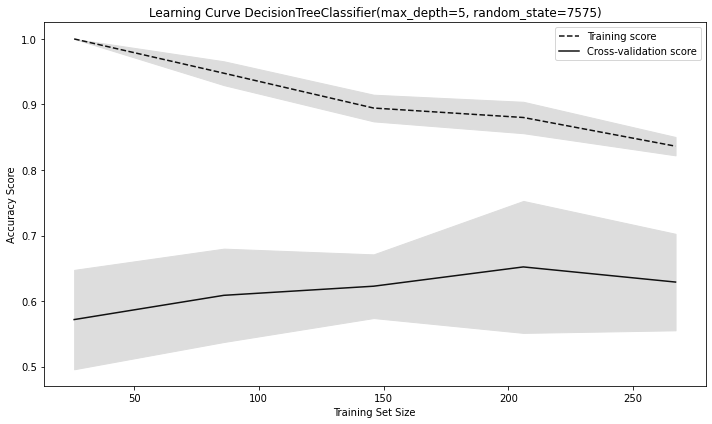

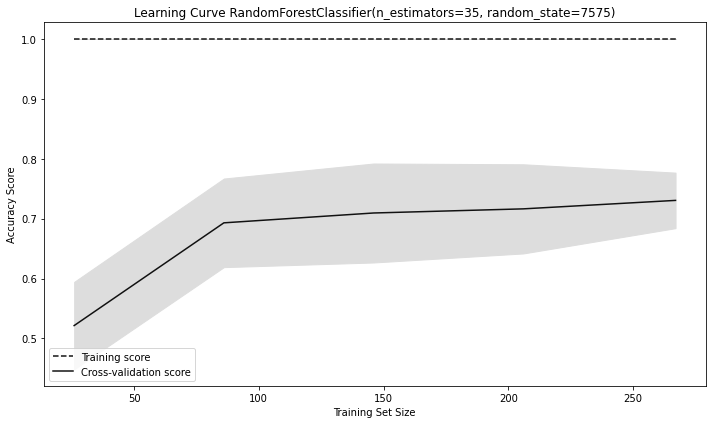

In [75]:
#'plot all'
for i in all_:
    
    train_sizes, train_scores, test_scores = learning_curve(i, X_test_orig, y_test_leTrans, cv=10, scoring='accuracy', n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.subplots(1, figsize=(10,6))
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.title(f"Learning Curve {i}")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    


#### ->  the accuracy in all 3 cases increases with increase of the training set size -> so the more data we have, the more accurate the results are